In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [48]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [52]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


2017-08-23 00:00:00
2016-08-23 00:00:00


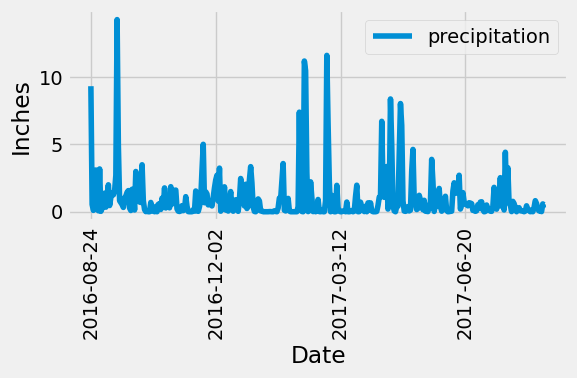

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
print(last_date)
# Calculate the date one year from the last date in data set.
start_date = last_date - dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores

data = [Measurement.date, 
       func.sum(Measurement.prcp)]
prcp_scores = session.query(*data).\
        filter(func.strftime(Measurement.date) >= start_date).\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_scores, columns=['measurement_date', 'precipitation'])
prcp_df.set_index('measurement_date', inplace=True)


# Sort the dataframe by date
prcp_df.sort_values(by='measurement_date')
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot( xlabel='Date', ylabel = "Inches", figsize=(6,4))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation_amount
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurement.station)).all()

[(19550,)]

In [80]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_df = [Measurement.station, 
       func.count(Measurement.date)]
active_stations = session.query(*station_df).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_df = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
active_df_details = session.query(*active_df).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for station in active_df_details:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


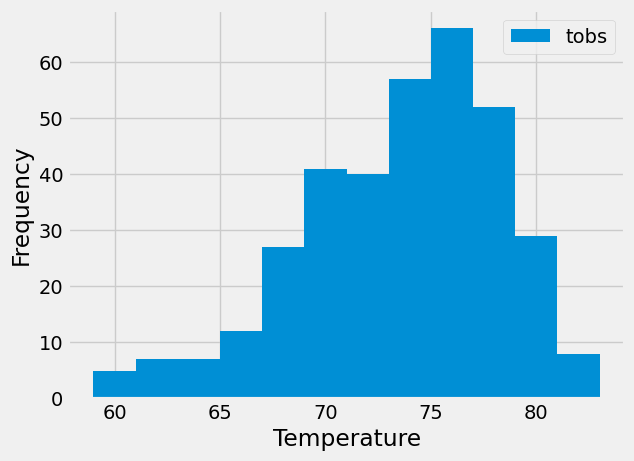

In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df = [Measurement.date, 
       Measurement.tobs]
temp_df_details= session.query(*temp_df).\
        filter(func.strftime(Measurement.date) >= start_date, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()



temp_df_detials_result = pd.DataFrame(temp_df_details, columns=['Measurement Date', 'Temperature'])
temp_df_detials_result.head()

plt.hist(temp_df_detials_result['Temperature'],bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.figsize=(7,5)
plt.show()

# Close session

In [93]:
# Close Session
session.close()